Non Local Means
===============

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour study image denoising using
non-local means. This algorithm has been
introduced for denoising purposes in [BuaCoMoA05](#biblio)

In [1]:
using PyPlot
using NtToolBox

Patches in Images
-----------------
This numerical tour is dedicated to the study of the structure of patches
in images.


Size $N = n \times n$ of the image.

In [2]:
n = 128

128

We load a noisy image $f_0\in \RR^N$.

In [3]:
c = [100, 200]
f0 = load_image("NtToolBox/src/data/lena.png")
f0 = rescale(f0[c[1] - Base.div(n, 2) + 1 : c[1] + Base.div(n, 2), c[2] - Base.div(n, 2) + 1 : c[2] + Base.div(n, 2)])

128×128 Array{Float32,2}:
 0.362205  0.362205  0.354331  0.401575  …  0.354331  0.362205  0.362205
 0.385827  0.354331  0.346457  0.362205     0.417323  0.385827  0.401575
 0.338583  0.338583  0.362205  0.346457     0.377953  0.385827  0.401575
 0.346457  0.338583  0.354331  0.362205     0.362205  0.362205  0.362205
 0.385827  0.338583  0.338583  0.354331     0.370079  0.377953  0.338583
 0.370079  0.362205  0.385827  0.354331  …  0.354331  0.385827  0.346457
 0.330709  0.354331  0.385827  0.346457     0.362205  0.377953  0.346457
 0.354331  0.362205  0.362205  0.354331     0.393701  0.362205  0.346457
 0.346457  0.354331  0.354331  0.354331     0.330709  0.393701  0.362205
 0.385827  0.354331  0.385827  0.354331     0.330709  0.330709  0.385827
 0.354331  0.354331  0.338583  0.377953  …  0.354331  0.354331  0.362205
 0.354331  0.354331  0.385827  0.362205     0.330709  0.338583  0.346457
 0.362205  0.370079  0.370079  0.385827     0.338583  0.362205  0.330709
 ⋮                       

Display $f_0$.

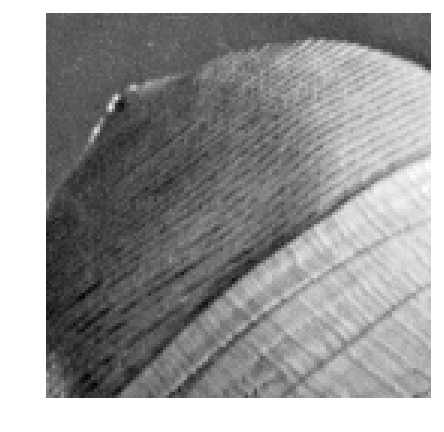

In [4]:
figure(figsize = (5, 5))
imageplot(f0)

Noise level $\si$.

In [5]:
sigma = .04

0.04

Generate a noisy image $f=f_0+\epsilon$ where $\epsilon \times
\Nn(0,\si^2\text{Id}_N)$.

In [6]:
using Distributions
f = f0 .+ sigma.*rand(Normal(), n, n)

128×128 Array{Float64,2}:
 0.310121  0.331575  0.421916  0.41914   …  0.404933  0.373489  0.366263
 0.371062  0.375166  0.367454  0.298638     0.409829  0.324649  0.391277
 0.338717  0.337497  0.350857  0.322122     0.305613  0.443315  0.328793
 0.358469  0.408959  0.302386  0.420562     0.36485   0.386978  0.353269
 0.366528  0.307268  0.334106  0.41304      0.394557  0.403713  0.349689
 0.301808  0.372549  0.383443  0.387839  …  0.337633  0.398922  0.343062
 0.271791  0.389746  0.422243  0.281307     0.326126  0.359733  0.318974
 0.397233  0.429843  0.395194  0.403108     0.402998  0.382453  0.380637
 0.375241  0.388268  0.349711  0.427031     0.301518  0.44367   0.255511
 0.369202  0.334936  0.424085  0.340765     0.33009   0.321673  0.33002 
 0.39084   0.361636  0.372712  0.314115  …  0.438289  0.320409  0.350257
 0.341601  0.383261  0.4244    0.366063     0.322722  0.400725  0.360035
 0.352725  0.376963  0.435233  0.383157     0.370172  0.409228  0.294399
 ⋮                       

Display $f$.

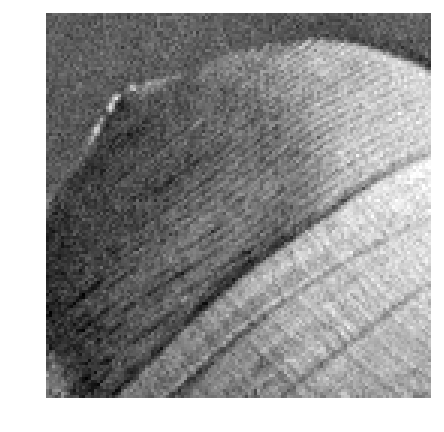

In [7]:
figure(figsize = (5,5))
imageplot(clamP(f))

We denote $w$ to be the half width of the patches,
and $w_1=2w+1$ the full width.

In [8]:
w = 3
w1 = 2*w + 1

7

We set up large $(n,n,w_1,w_1)$ matrices to index the the X and Y
position of the pixel to extract.

Location of pixels to extract.

In [9]:
include("ndgrid.jl") # Il ne faut pas oublier de mettre ndgrid.jl dans le package et exporter la fonction meshgrid.
(X, Y) = meshgrid(1 : n, 1 : n)
(dX, dY) = meshgrid(-w : w, -w : w)
dX = reshape(dX, (1, 1, w1, w1))
dY = reshape(dY, (1, 1, w1, w1))
X = repeat(X, inner = [1, 1, w1, w1]) + repeat(dX, inner = [n, n, 1, 1])
Y = repeat(Y, inner = [1, 1, w1, w1]) + repeat(dY, inner = [n, n, 1, 1])



128×128×7×7 Array{Int64,4}:
[:, :, 1, 1] =
  -2   -2   -2   -2   -2   -2   -2   -2  …   -2   -2   -2   -2   -2   -2   -2
  -1   -1   -1   -1   -1   -1   -1   -1      -1   -1   -1   -1   -1   -1   -1
   0    0    0    0    0    0    0    0       0    0    0    0    0    0    0
   1    1    1    1    1    1    1    1       1    1    1    1    1    1    1
   2    2    2    2    2    2    2    2       2    2    2    2    2    2    2
   3    3    3    3    3    3    3    3  …    3    3    3    3    3    3    3
   4    4    4    4    4    4    4    4       4    4    4    4    4    4    4
   5    5    5    5    5    5    5    5       5    5    5    5    5    5    5
   6    6    6    6    6    6    6    6       6    6    6    6    6    6    6
   7    7    7    7    7    7    7    7       7    7    7    7    7    7    7
   8    8    8    8    8    8    8    8  …    8    8    8    8    8    8    8
   9    9    9    9    9    9    9    9       9    9    9    9    9    9    9
  10   10   10   10  

We handle boundary condition by reflexion

In [10]:
X[X .< 1] = 2 .- X[X .< 1] 
Y[Y .< 1] = 2 .- Y[Y .< 1]
X[X .> n] = 2*n .- X[X .> n]
Y[Y .> n] = 2*n .- Y[Y .> n]

5376-element Array{Int64,1}:
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
   ⋮
 127
 126
 125
 127
 126
 125
 127
 126
 125
 127
 126
 125

Patch extractor operator.

In [11]:
I = X .+ (Y .- 1)*n
for i in 1 : Base.div(n, w)
    for j in 1 : Base.div(n, w)
        I[i, j, :, :] = transpose(I[i, j, :, :])
    end
end
        
#function patch(f)
#    P = zeros(n, n, w1, w1)
#    for i in 1:length(f[:, 1])
#        for j in 1:length(f[1, :])
#            P[i, j, :, :] = f[I[i, j, :, :]]
#        end
#    end
#    return P
#end
function patch(f)
    return f[I]
end

patch (generic function with 1 method)

Define the patch matrix $P$ of size $(n,n,w_1,w_1)$.
Each $P(i,j,:,:)$ represent an $(w_1,w_1)$ patch extracted around pixel
$(i,j)$ in the image.

In [12]:
P = patch(f)

128×128×7×7 Array{Float64,4}:
[:, :, 1, 1] =
 0.420562  0.322122  0.298638  0.41914   …  0.428573  0.44862   0.496517
 0.302386  0.350857  0.367454  0.421916     0.488337  0.439019  0.463395
 0.408959  0.337497  0.375166  0.331575     0.428263  0.459281  0.433398
 0.358469  0.338717  0.371062  0.310121     0.505774  0.528377  0.5479  
 0.408959  0.337497  0.375166  0.331575     0.428263  0.459281  0.433398
 0.302386  0.350857  0.367454  0.421916  …  0.488337  0.439019  0.463395
 0.420562  0.322122  0.298638  0.41914      0.428573  0.44862   0.496517
 0.314689  0.435777  0.426165  0.384639     0.386027  0.432706  0.462501
 0.353112  0.374979  0.379442  0.39974      0.491674  0.4753    0.440267
 0.411506  0.357536  0.324394  0.411828     0.382523  0.478623  0.35104 
 0.28269   0.387966  0.392045  0.384901  …  0.288662  0.340924  0.319882
 0.343019  0.361621  0.385085  0.343604     0.31774   0.343886  0.280956
 0.310331  0.372574  0.361015  0.324292     0.231817  0.140795  0.167252
 ⋮    

Display some example of patches.

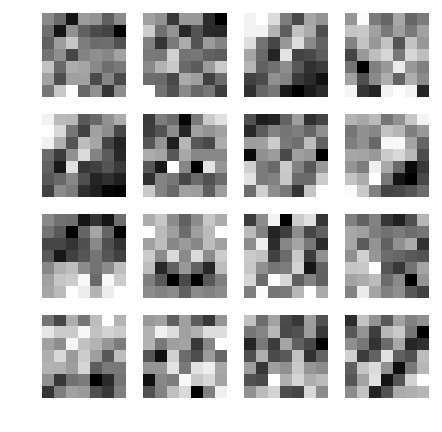

In [13]:
figure(figsize = (5,5))
for i in 1:16
    x = rand(1 : n)
    y = rand(1 : n)
    imageplot(P[x, y, :, :], "", [4, 4, i])
end

Dimensionality Reduction with PCA
---------------------------------
Since NL-means type algorithms require the computation of many distances
between patches, it is advantagous to reduce the dimensionality of the
patch while keeping as much as possible of information.


Target dimensionality $d$.

In [14]:
d = 25

25

A linear dimensionality reduction is obtained by Principal Component
Analysis (PCA) that projects the data on a small number of leading
direction of the covariance matrix of the patches.


Turn the patch matrix into an $(w_1*w_1,n*n)$ array, so that each $P(:,i)$
is a $w_1*w_1$ vector representing a patch.

In [15]:
resh = P -> transpose((reshape(P, (n*n,w1*w1))))

(::#3) (generic function with 1 method)

Operator to remove the mean of the patches to each patch.

In [16]:
remove_mean = Q -> Q - repeat(mean(Q, 1), inner = (w1*w1, 1))

(::#5) (generic function with 1 method)

Compute the mean and the covariance of the points cloud representing the
patches.

In [17]:
P1 = remove_mean(resh(P))
C = P1*transpose(P1)

49×49 Array{Float64,2}:
 131.936     77.2095     46.5651   …  -25.4735   -23.785    -17.5533  
  77.2095   121.381      67.3999      -25.9776   -26.7635   -24.1005  
  46.5651    67.3999    112.653       -25.7255   -26.301    -26.0259  
  27.8702    37.7467     59.4592      -28.8331   -25.0024   -24.7251  
  18.1669    20.245      31.3374      -29.9974   -26.6962   -21.9355  
  10.1857    12.4336     14.8341   …  -30.2334   -26.4507   -22.151   
   2.25873    6.15092     8.88626     -25.7245   -24.7144   -19.9362  
  67.2198    68.495      54.8283      -21.4129   -22.696    -22.7255  
  44.0538    55.9557     57.9443      -25.0261   -23.1991   -23.5449  
  25.3588    34.2606     46.9429      -29.7959   -25.3353   -22.4983  
  13.7735    16.8541     26.6187   …  -32.7065   -28.6216   -23.1829  
   4.45361    7.02014    10.8829      -30.2134   -29.5932   -24.6672  
  -3.04818   -0.227483    2.91176     -25.7234   -25.0746   -23.5566  
   ⋮                               ⋱                 

Extract the eigenvectors, sorted by decreasing amplitude.

In [18]:
(D, V) = eig(C)
D = sort(D, rev = true)
I = sortperm(D)[end : -1 : 1]
V = V[I, :]

49×49 Array{Float64,2}:
 -0.142857   0.00288788   0.022342     0.115746    …  -0.201372     0.166028 
 -0.142857  -0.0775719   -0.039154    -0.237704       -0.215737     0.188468 
 -0.142857  -0.0466216    0.0304623    0.259052       -0.193864     0.201698 
 -0.142857  -0.00291281   0.0788866   -0.167343       -0.129294     0.203078 
 -0.142857   0.0375051    0.0861557    0.0362725      -0.0335826    0.188389 
 -0.142857   0.0581363    0.0609241   -0.00981668  …   0.0672203    0.156301 
 -0.142857   0.112538    -0.0793377   -0.0184382       0.133927     0.108932 
 -0.142857   0.0871356   -0.0240147   -0.0699827      -0.214902     0.171969 
 -0.142857   0.14265      0.0539251    0.207983       -0.19236      0.18962  
 -0.142857   0.1124      -0.151321    -0.26095        -0.118351     0.191938 
 -0.142857  -0.0294305   -0.205379     0.190192    …  -0.00851431   0.17653  
 -0.142857  -0.113902    -0.175673    -0.0191166       0.101116     0.141956 
 -0.142857  -0.159439    -0.0894712    0

Display the decaying amplitude of the eigenvalues.

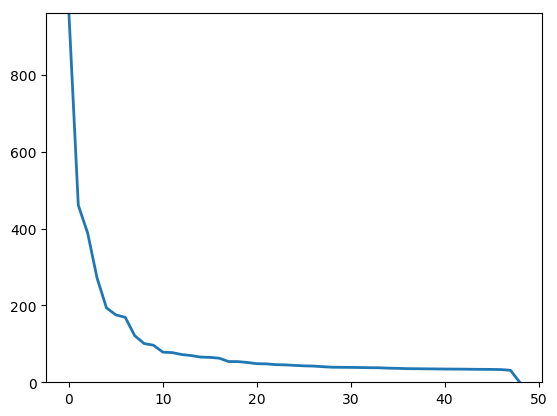

In [19]:
plot(D, linewidth = 2)
ylim(0, maximum(D))
show()

Display the leading eigenvectors - they look like Fourier modes.

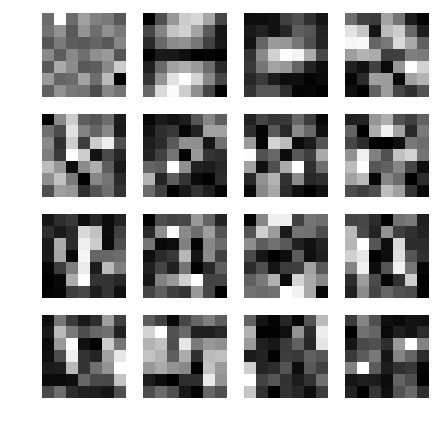

In [20]:
figure(figsize = (5,5))
for i in 1:16
    imageplot(abs(reshape(V[:,i], (w1,w1))), "", [4, 4, i])
end

Patch dimensionality reduction operator.

In [21]:
iresh = Q -> reshape(Q', (n, n, d)) # order = "F"
descriptor = f -> iresh(V[: , 1 : d]'*remove_mean(resh(P)))
remove_mean(resh(P))[1, :]

16384-element Array{Float64,1}:
  0.0628797 
 -0.0601156 
  0.0433663 
 -0.0076114 
  0.0415792 
 -0.063938  
  0.0552831 
 -0.0501452 
 -0.00654325
  0.0581593 
 -0.0670696 
 -0.00293932
 -0.0351177 
  ⋮         
 -0.0810145 
 -0.10699   
 -0.040066  
  0.108777  
  0.0189314 
  0.0347488 
  0.0185005 
 -0.00987702
  0.020824  
  0.140613  
  0.0938184 
  0.0223174 

Each $H(i,j,:)$ is a $d$-dimensional descriptor
of a patch.

In [22]:
H = descriptor(f)
H[1, 1, :]

25-element Array{Float64,1}:
  1.12757e-16
  0.00303514 
 -0.057321   
  0.00279343 
  0.0252618  
 -0.00510602 
 -0.0100753  
 -0.00124721 
  0.0147514  
  0.0228865  
  0.00793989 
  0.0926927  
  0.0949608  
  0.0191861  
 -0.0162093  
  0.0132067  
 -0.00514667 
  0.0530679  
 -0.0316565  
 -0.00451908 
 -0.0086364  
 -0.00777439 
 -0.146048   
 -0.00399402 
 -0.00891363 

Non-local Filter
----------------
NL-means applies, an adaptive averaging kernel
is computed from patch distances to each pixel location.


We denote $H_{i} \in \RR^d$ the descriptor at pixel $i$.
We define the distance matrix
$$ D_{i,j} = \frac{1}{w_1^2}\norm{H_i-H_j}^2. $$



Operator to compute the distances $(D_{i,j})_j$ between the patch around $i=(i_1,i_2)$
and all the other ones.

In [23]:
distance = i -> sum((H - repeat(reshape(H[i[1], i[2], :], (1, 1, length(H[i[1], i[2], :]))), inner = [n, n, 1])).^2, 3)./(w1*w1)

(::#11) (generic function with 1 method)

The non-local mean filter computes a denoised image $\tilde f$ as :

$$ \tilde f_i = \sum_j K_{i,j} f_j $$
where the weights $K$ are computed as :
$$ K_{i,j} = \frac{ \tilde K_{i,j} }{ \sum_{j'} \tilde K_{i,j'} }
      \qandq
   \tilde K_{i,j} = e^{-\frac{D_{i,j}}{2\tau^2}} . $$



The width $\tau$ of the Gaussian is very important and should be adapted to match
the noise level.



Compute and normalize the weight.

In [24]:
normalize = K -> K./sum(K)
kernel = (i, tau) -> normalize(exp(-distance(i)./(2*tau^2)))

(::#15) (generic function with 1 method)

Compute a typical example of kernel for some pixel position $(x,y)$.

In [25]:
tau = .05
i = [83, 72]
D = distance(i)
H[i[1], i[2], :]
K = kernel(i, tau)
D

128×128×1 Array{Float64,3}:
[:, :, 1] =
 0.00295118  0.00227457  0.00312287  …  0.00485491  0.00488994  0.00503266
 0.00259518  0.00283335  0.00222588     0.00378126  0.00465444  0.00269188
 0.00309054  0.00297622  0.00237054     0.00343972  0.00366405  0.00546961
 0.00230125  0.00349517  0.00192803     0.00550008  0.00633937  0.00564258
 0.00321561  0.00167929  0.00294033     0.00402107  0.00260499  0.00340563
 0.00397462  0.00264592  0.00322254  …  0.00382952  0.00600861  0.00397644
 0.00245938  0.0020279   0.00312583     0.00476732  0.00374555  0.00489222
 0.00274398  0.00164827  0.00266606     0.00464598  0.00539079  0.00396139
 0.002302    0.00240738  0.0030592      0.00523817  0.00437711  0.00538495
 0.00295479  0.00121129  0.00368635     0.00277393  0.00259435  0.00276076
 0.00185107  0.002613    0.00297119  …  0.00439295  0.00463488  0.0042115 
 0.00240684  0.00180074  0.00291328     0.00338667  0.00283772  0.00312385
 0.00251598  0.00311237  0.002596       0.00341123  0.003990

Display the squared distance and the kernel.

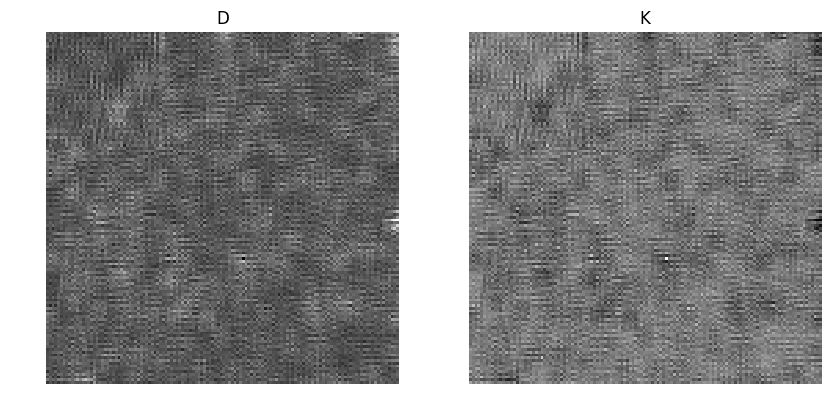

PyObject <matplotlib.text.Text object at 0x000000001EE5BF60>

In [26]:
figure(figsize = (10,10))
imageplot(D[:, :], "D", [1, 2, 1])
imageplot(K[:, :], "K", [1, 2, 2])

Localizing the Non-local Means
------------------------------
We set a "locality constant" $q$ that set the maximum distance between
patches to compare. This allows to speed up computation, and makes
NL-means type methods semi-global (to avoid searching in all the image).

In [27]:
q = 14

14

Using this locality constant, we compute the distance between patches
only within a window.
Once again, one should be careful about boundary conditions.

In [29]:
#selection = i -> np.array((clamP(np.arange(i[1]-q,i[1] + q + 1), 0, n-1), clamP(np.arange(i[1]-q,i[1] + q + 1), 0, n-1)))
selection = i -> [clamP(collect(i[1] - q + 1 : i[1] + q + 1), 1, n)'; clamP(collect(i[1] - q + 1 : i[1] + q + 1), 1, n)']

(::#19) (generic function with 1 method)

Compute distance and kernel only within the window.

In [30]:
function distance_0(i, sel)
    H1 = (H[sel[1, :],:,:])
    H2 = (H1[:,sel[2, :],:])
    return sum((H2 - repeat(reshape(H[i[1], i[2], :], (1, 1, length(H[i[1], i[2], :]))), inner = [length(sel[1, :]), length(sel[2, :]), 1])), 
    3)/(w1*w1)
end

distance = i -> distance_0(i, selection(i))
kernel = (i, tau) -> normalize(exp(-distance(i)./(2*tau^2)))



(::#23) (generic function with 1 method)

Compute a typical example of kernel for some pixel position $(x,y)$.

Display the squared distance and the kernel.

In [31]:
sel = selection(i)
D = distance(i)
K = kernel(i, tau)


29×29×1 Array{Float64,3}:
[:, :, 1] =
 0.00150359   0.00331627   6.83253e-5   …  0.00239348   0.00041119 
 0.000467514  0.000236781  0.00251782      0.000850111  0.00193867 
 0.00075818   0.00360707   0.000962478     0.000245312  0.000591722
 0.000267653  0.000326701  0.000258885     0.000398922  0.00233789 
 0.00084619   0.000563018  0.00307985      0.00269301   0.000650247
 0.000846278  0.00179653   0.000351704  …  0.000408738  0.000373752
 0.00141865   0.000229179  0.000374389     0.00198729   0.00115064 
 0.000221269  0.00258376   0.000605844     0.00121756   0.000417504
 0.000918029  0.000436057  0.00128788      0.00127099   0.000482956
 0.000516951  0.000268027  0.00166792      0.000316963  0.00505622 
 0.00169658   0.000419005  0.00126345   …  0.000606645  0.000626355
 0.00180485   0.000572404  0.000599983     0.00140198   0.00151399 
 0.000583443  0.00231071   0.000851272     0.000184051  0.000926002
 ⋮                                      ⋱                          
 8.48065e-

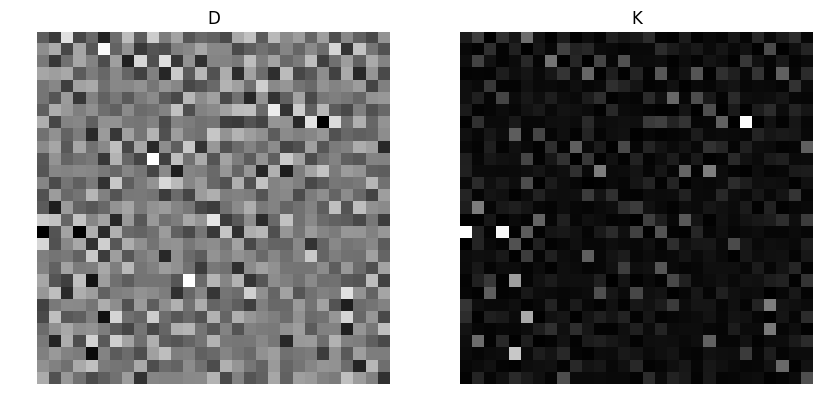

PyObject <matplotlib.text.Text object at 0x0000000022CA5E10>

In [32]:
figure(figsize = (10,10))

imageplot(D[:, :], "D", [1, 2, 1])
imageplot(K[:, :], "K", [1, 2, 2])

The NL-filtered value at pixel $(x,y)$ is obtained by averaging the values
of $f$ with the weight $K$.

In [33]:
function NLval_0(K,sel)
    f_temp = f[sel[1, :], :]
    return sum(K.*f_temp[:, sel[1, :]])
end

NLval = (i, ta) -> NLval_0(kernel(i, tau), selection(i))


(::#25) (generic function with 1 method)

We apply the filter to each pixel location
to perform the NL-means algorithm.

In [34]:
(Y, X) = meshgrid(0 : n - 1, 0 : n - 1)

function arrayfun(f, X, Y)
    n = size(X)[1]
    p = size(Y)[1]
    R = zeros(n, p)
    for k in 1:n
        for l in 1:p
            R[k,l] = f(k,l)
        end
    end
    return R
end

NLmeans = tau -> arrayfun((i1, i2) -> NLval([i1,i2], tau), X, Y)

(::#27) (generic function with 1 method)

Display the result for some value of $\tau$.

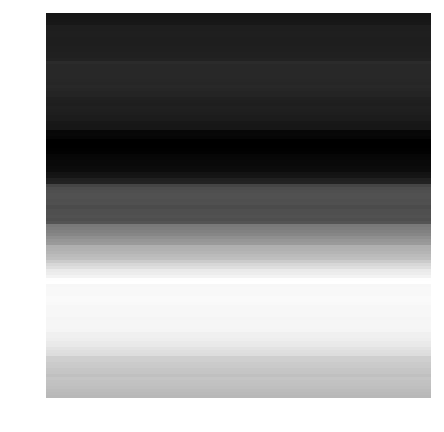

In [36]:
tau = .03

figure(figsize = (5,5))
imageplot(NLmeans(tau))
#NLmeans(tau)
#n = size(X)[1]
#p = size(Y)[1]
#R = zeros(n, p)
#for k in 1:n
#    for l in 1:p
#        R[k,l] = f(k,l)
#    end
#end


In [ ]:
tau = .03


__Exercise 1__

Compute the denoising result for several values of $\tau$ in order to
determine the optimal denoising that minimizes $\norm{\tilde f - f_0}$.

In [36]:
#run -i nt_solutions/denoisingadv_6_nl_means/exo1
include("Exos\\denoisingadv_6_nl_means\\exo1.jl")

LoadError: LoadError: BoundsError: attempt to access 128×128×25 Array{Float64,3} at index [[0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],Colon(),Colon()]
while loading C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_6_nl_means\exo1.jl, in expression starting on line 6

In [36]:
## Insert your code here.

Display the best result.

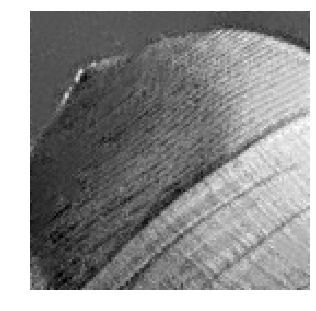

In [37]:
plt.figure(figsize = (5,5))
imageplot(clamp(fNL))

__Exercise 2__

Explore the influence of the $q$ and $w$ parameters.

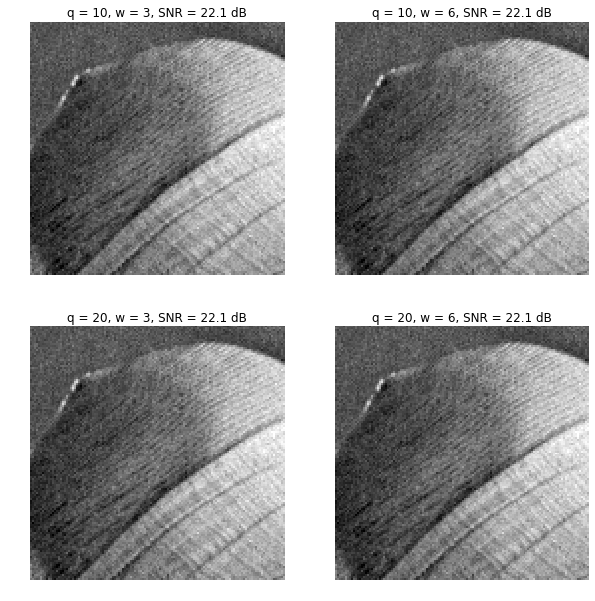

In [38]:
run -i nt_solutions/denoisingadv_6_nl_means/exo2

In [39]:
## Insert your code here.

Bibliography
------------
<html><a name="biblio"></a></html>


* [BuaCoMoA05] Buades, B. Coll, J.f Morel, [A review of image denoising algorithms, with a new one][1], SIAM Multiscale Modeling and Simulation, Vol 4 (2), pp: 490-530, 2005.

[1]:http://dx.doi.org/10.1137/040616024